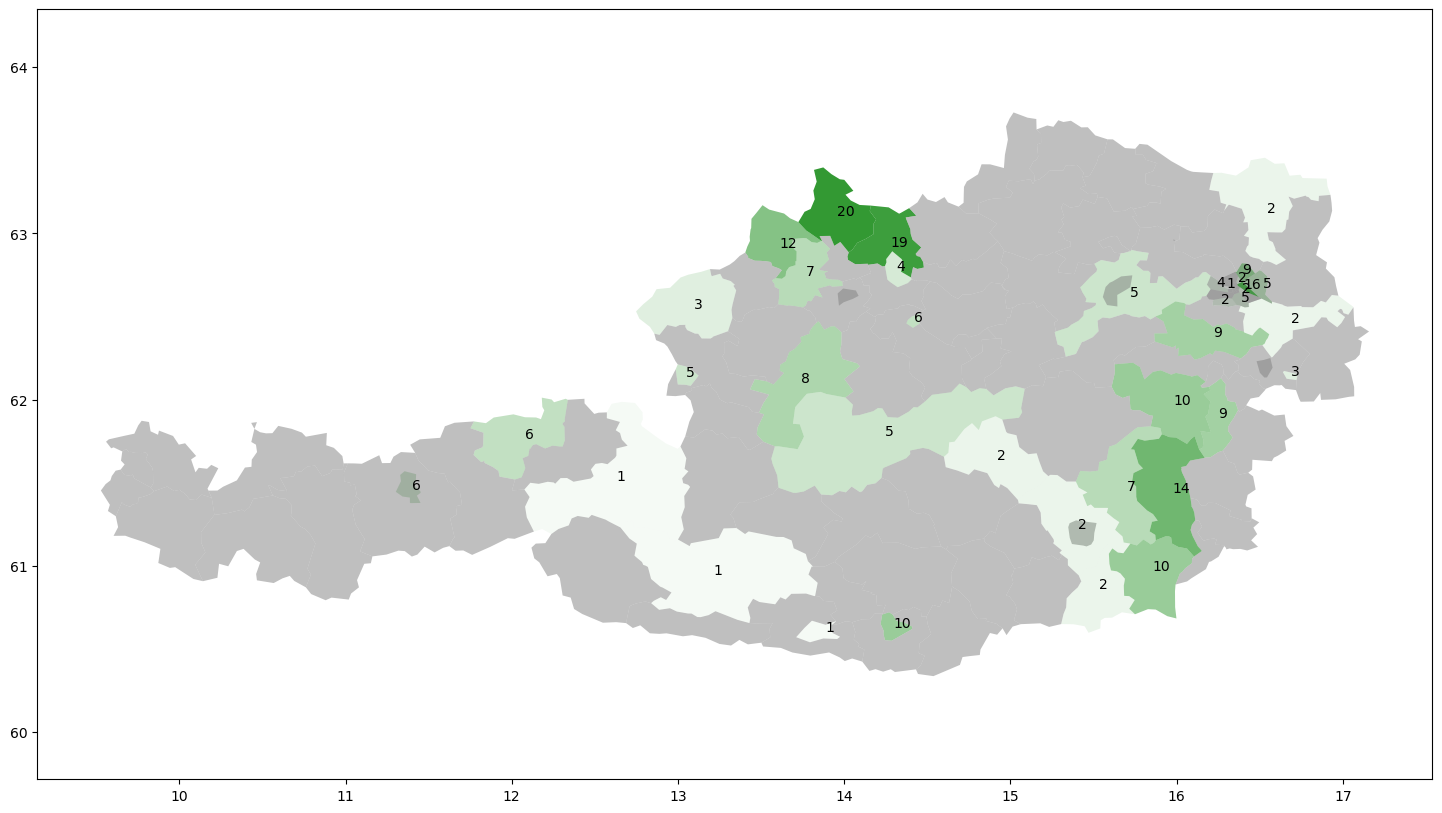

In [2]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt

#Load and read the geojson file for Italys regions. 

#at_url = "https://github.com/ginseng666/GeoJSON-TopoJSON-Austria/blob/81df08cced08b02a873f6375e17424e053a99ac0/2021/simplified-99.9/bezirke_999_geo.json"
#with urllib.request.urlopen(at_url) as url:
        #jdata = json.loads(url.read().decode())
    
#           1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42
s_bricks = [102,201,202,206,303,304,313,315,316,320,321,401,402,404,407,408,413,414,416,501,506,602,606,610,611,612,617,622,623,624,625,701,705,902,903,910,914,916,920,921,922,923]
#          1 2  3 4 5 6 7 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42
s_sales = [3,10,1,1,9,2,2,10,5,9, 1, 4, 6, 3, 8, 7, 20,12,19,5, 1, 8, 2, 2, 2, 5, 7, 14,10,3, 2, 6, 6, 16,2, 5, 4, 1, 2, 9, 5, 2]
s_exclude = []  # prevent double brick lookup
    
# {'type': 'FeatureCollection', 'name': 'bezirke_999_geo', 'crs': 
# {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}, 'features': 
# [{'type': 'Feature', 'properties': {'iso': '322', 'name': 'Waidhofen an der Thaya'}, 'geometry': 
# {'type': 'MultiPolygon', 'coordinates': [[[[15.235486190707704, 48.75154503502358], [15.218308905888918, 

MY_PATH = r'D:\DL\lrgtxt0'
os.chdir(MY_PATH)
with open('AT0.geojson', 'r', encoding='utf-8') as f:
    jdata = json.load(f)  # iso is the brick number

fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')
fig.set_size_inches(18, 10)

pts = []  # list of points defining boundaries of polygons
for  feature in jdata['features']:
    #print(feature['properties']['iso'])  # brick
    if feature['geometry']['type'] == 'Polygon':
        pts.extend(feature['geometry']['coordinates'][0])      
    elif feature['geometry']['type'] == 'MultiPolygon':
        for polyg in feature['geometry']['coordinates']:
            x = [el[0] for el in polyg[0]]
            y = [el[1]*1.3 for el in polyg[0]]  # stretch into y a bit
            if int(feature['properties']['iso']) in s_bricks and not int(feature['properties']['iso']) in s_exclude:
                #print(feature['properties']['iso'], feature['properties']['name'])
                s_exclude.append(int(feature['properties']['iso']))
                if int(s_sales[s_bricks.index(int(feature['properties']['iso']))]) > 0:
                    axs.fill(x, y, "g", alpha=int(s_sales[s_bricks.index(int(feature['properties']['iso']))])/25)
                xt = sum(x) / len(x)  # find center of polygon
                yt = sum(y) / len(y)
                axs.annotate(s_sales[s_bricks.index(int(feature['properties']['iso']))], xy=(xt, yt))
            else:
                axs.fill(x, y, "grey", alpha=0.5)
    elif feature['geometry']['type'] == 'LineString': 
        pts.extend(feature['geometry']['coordinates'])
    else: pass           

plt.show()

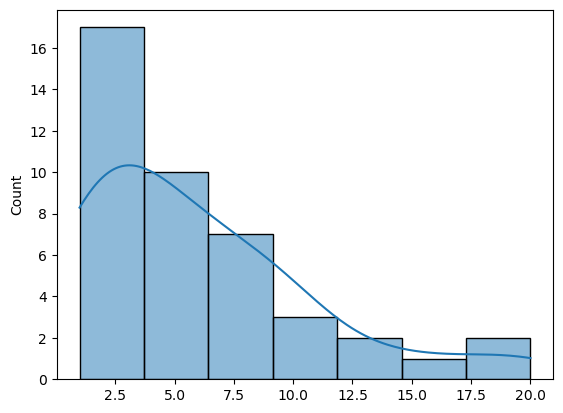

In [3]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
#sns.set(style="darkgrid")
#df = sns.load_dataset("iris")
s_sales = np.array([3,10,1,1,9,2,2,10,5,9, 1, 4, 6, 3, 8, 7, 20,12,19,5, 1, 8, 2, 2, 2, 5, 7, 14,10,3, 2, 6, 6, 16,2, 5, 4, 1, 2, 9, 5, 2])

#sns.histplot(data=s_sales, x="sepal_length", kde=True)
sns.histplot(data=s_sales, kde=True)
plt.show()

In [4]:
class TuringM:
    def __init__(self):
        self.m_config = 'b'
        self.head_pos = 0
    
    def statetrans(self):
        if self.m_config == 'b':
            print(0)
            self.head_pos += 1
            self.m_config = 'c'
        elif self.m_config == 'c':
            self.head_pos += 1
            self.m_config = 'e'
        elif self.m_config == 'e':
            print(1)
            self.head_pos += 1
            self.m_config = 'f'
        else:
            self.head_pos += 1
            self.m_config = 'b'
            
t0 = TuringM()
for i in range(15):
    t0.statetrans()

0
1
0
1
0
1
0
1


In [5]:
import pandas
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


MY_PATH = r'C:\Users\User\Desktop\OptTherme'
os.chdir(MY_PATH)

df = pandas.read_csv(r'UNT330A_20220818_111727.log.csv')
#print(df)
df.plot(x="DateTime", y=["C"])
plt.show()

peaks, _ = find_peaks(df["C"], height=(24, 30), distance = 100)  # height: choose peaks in this range; distance = between points
print(peaks)
print([df["C"][p] for p in peaks])

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\User\\Desktop\\OptTherme'

In [1]:
# Rakki maths II
import random

def sample_div(n=4, m=2):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m) - 1
    b = max(2, b)
    return (a, b, a//b, a % b)

def sample_mult(n=3, m=3):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m)
    return (a, b, a*b)

for i in range(2):
    problem = sample_div()
    print(f"{problem[0]} : {problem[1]} = {problem[2]}, R {problem[3]}")
for i in range(0):
    problem = sample_mult()
    print(f"{problem[0]} * {problem[1]} = {problem[2]}")

8844 : 81 = 109, R 15
9744 : 62 = 157, R 10


In [5]:
# descriptors

class A:
    def f(self):
        pass
    
def functions():
    a = A()
    print(a.f)
    print(A.f)
    
functions()
print(A.__dict__)  # reach into the class dict

<bound method A.f of <__main__.A object at 0x000001F14D16EE30>>
<function A.f at 0x000001F14EBA5990>
{'__module__': '__main__', 'f': <function A.f at 0x000001F14EBA5990>, '__dict__': <attribute '__dict__' of 'A' objects>, '__weakref__': <attribute '__weakref__' of 'A' objects>, '__doc__': None}


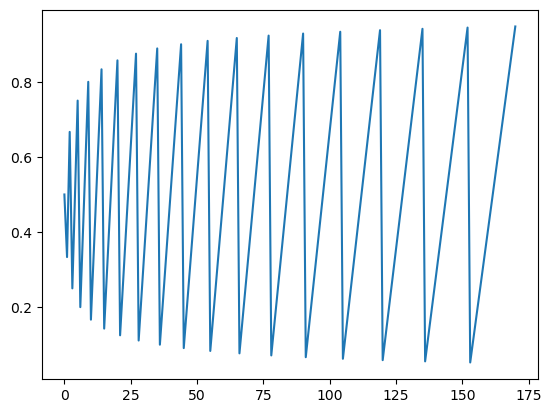

In [2]:

import matplotlib.pyplot as plt

def fracseries():
    res = []
    for n in range(1,20):
        for k in range(1,n):
            res.append(k/n)
    return res

plt.plot(fracseries())
plt.show()

In [13]:

def fracseries1(n):
    return [1/2**(k+1) for k in range(n)]

def fracseries2(n):
    return [k/2**(k+1) for k in range(n)]

def fracseries3(n):
    return [(1/k) - (1/k**2) for k in range(1,n)]

print(sum(fracseries1(1200)) - sum(fracseries2(1200)))
print(sum(fracseries3(100000)))

1.1102230246251565e-16
10.445212063065217


In [16]:

def num_diff(f, x, h):
    return (f(x+h) - f(x)) / h

print(num_diff(lambda x: x**2, 1, 0.1))

2.100000000000002


In [20]:

def const(n):
    return (n,n)

def add(x, y):
    return (x[0]+y[0], x[1]+y[1])

def times(x, y):
    return (x[0]-y[0], x[1]-y[0]+x[0]-y[1])

def a_function(x):
    return add(times(x, x), add(x, const(1)))

a_function([1,1])

(2, 2)

In [12]:
import math

def pqalgo(p,q):
    res = []
    curr_sub = 1
    n = 1
    while p > 1:
        while curr_sub > p/q:
            n += 1
            curr_sub = 1/n
        p = p*n - q
        q *= n
        pqgcd = math.gcd(int(p), int(q))
        if pqgcd > 1:
            p /= pqgcd
            q /= pqgcd
        res.append((p,q))
    return res

pqalgo(7243, 4140)

[(3103, 4140),
 (1033.0, 4140.0),
 (41.0, 828.0),
 (11.0, 5796.0),
 (1.0, 3054492.0)]

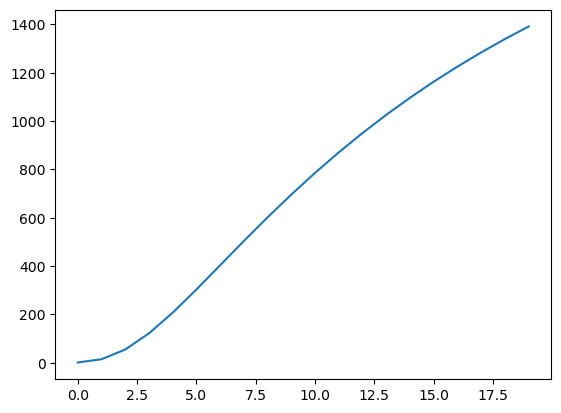

In [8]:
# picturing a scale
import math
import matplotlib.pyplot as plt

plt.plot([math.exp(8/(t+2)*t) for t in range(20)])
plt.show()

In [1]:
import math

def pqalgo(p,q):
    '''composition of fraction p/q as 1/q0 + 1/q1 + ...'''
    res = []
    curr_sub = 1
    n = 1
    while p > 1:
        while curr_sub > p/q:
            n += 1
            curr_sub = 1/n
        p = p*n - q
        q *= n
        pqgcd = math.gcd(int(p), int(q))
        if pqgcd > 1:
            p /= pqgcd
            q /= pqgcd
        res.append((p,q))
    return res

pqalgo(8433, 3744)

[(521.0, 416.0), (105.0, 416.0), (1.0, 416.0)]

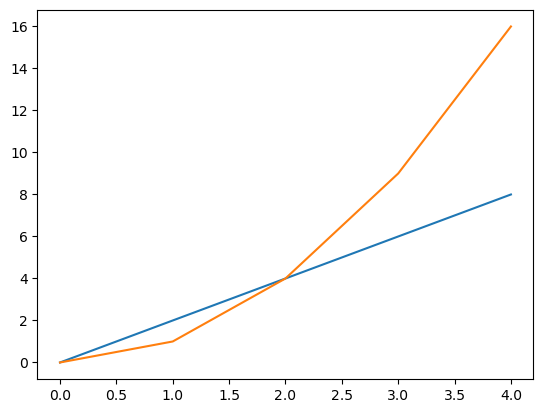

In [1]:
import matplotlib.pyplot as plt

plt.plot([2*r for r in range(5)])
plt.plot([r*r for r in range(5)])
plt.show()

In [1]:
# Rakki maths 1st test
import random

def sample_div(n=3, m=2):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m) - 1
    b = max(2, b)
    return (a, b, a//b, a % b)

def sample_mult(n=3, m=1):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m)
    return (a, b, a*b)

def sample_rect(n=3, m=3):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m)
    c = random.randint(10**(m-2), 10**(m-1))
    return 'Ein rechteckiges Grundstück soll eingezäunt werden. Die Länge ist ' + str(a) + ', die Breite ist ' + str(b) + ', die Einfahrt ' + str(c) + ' Meter. Wie viel Zaun brauche ich?'

def write_number(n=4):
    a = random.randint(10**(n-1), 10**n)
    lttrs = ['T', 'H', 'Z', 'E']
    res = [c + lttrs[i + (len(lttrs)-n)] for i,c in enumerate(str(a))]
    random.shuffle(res)
    return res

def conv_nr(n=2):
    a = random.randint(10**(n-1), 10**n)
    return 'Wie viele mm sind ' + str(a) + 'm?'

for i in range(3):
    problem = sample_div()
    print(f"{problem[0]} : {problem[1]} = {problem[2]}, R {problem[3]}")
for i in range(3):
    problem = sample_mult()
    print(f"{problem[0]} * {problem[1]} = {problem[2]}")
for i in range(3): 
    print(f"{sample_rect()}")
for i in range(3):
    print(f"{write_number()}")
for i in range(3):
    print(f"{conv_nr()}")

990 : 72 = 13, R 54
578 : 56 = 10, R 18
597 : 58 = 10, R 17
696 * 10 = 6960
163 * 6 = 978
614 * 2 = 1228
Ein rechteckiges Grundstück soll eingezäunt werden. Die Länge ist 655, die Breite ist 574, die Einfahrt 78 Meter. Wie viel Zaun brauche ich?
Ein rechteckiges Grundstück soll eingezäunt werden. Die Länge ist 257, die Breite ist 880, die Einfahrt 76 Meter. Wie viel Zaun brauche ich?
Ein rechteckiges Grundstück soll eingezäunt werden. Die Länge ist 492, die Breite ist 261, die Einfahrt 63 Meter. Wie viel Zaun brauche ich?
['1Z', '9T', '9H', '5E']
['6H', '1Z', '4T', '6E']
['2E', '4H', '5T', '3Z']
Wie viele mm sind 74m?
Wie viele mm sind 50m?
Wie viele mm sind 15m?


In [ ]:
# Arztsuche

# https://www.aerztekammer.at/arztsuche

# NÖ https://www.arztnoe.at/arztsuche/10002
# Wien
# https://www.praxisplan.at/List-new.php?pp_s_id=771&pp_doctype=resident&pp_first=&pp_last=&pp_zip=1130&pp_gender=-1&pp_id_field=-1&pp_id_additional_field=-1&pp_id_special_field=-1&pp_id_kk=-1&pp_o_mo=&pp_morning_afternoon=&pp_from=-1&pp_till=-1&pp_id_lingo=-1&pp_dORb=&ppb_blinde=&ppb_gebaerden=&ppb_parkplatz=&ppb_zugang=&ppb_rampe=&ppb_wc=&ppb_hoehe=&pp_open_now=&page=&page=15&ppb_distance=999
# https://www.praxisplan.at/List-new.php?pp_first=&pp_last=&pp_zip=1130&pp_gender=-1&pp_id_field=-1&pp_id_additional_field=-1&pp_id_special_field=-1&pp_id_kk=-1&pp_o_mo=&pp_morning_afternoon=&pp_from=-1&pp_till=-1&pp_id_lingo=-1&pp_dORb=&ppb_blinde=&ppb_gebaerden=&ppb_parkplatz=&ppb_zugang=&ppb_rampe=&ppb_wc=&ppb_hoehe=&pp_open_now=&page=&page=15&ppb_distance=999
# https://www.praxisplan.at/List-new.php?pp_first=&pp_last=&pp_zip=1130&pp_gender=-1&pp_id_field=-1&pp_id_additional_field=-1&pp_id_special_field=-1&pp_id_kk=-1&pp_o_mo=&pp_morning_afternoon=&pp_from=-1&pp_till=-1&pp_id_lingo=-1&pp_dORb=&ppb_blinde=&ppb_gebaerden=&ppb_parkplatz=&ppb_zugang=&ppb_rampe=&ppb_wc=&ppb_hoehe=&pp_open_now=&page=&page=1&ppb_distance=999

# https://www.praxisplan.at/List-new.php?pp_first=&pp_last=&pp_zip=1130&pp_gender=-1&pp_id_field=-1&pp_id_additional_field=-1&pp_id_special_field=-1&pp_id_kk=-1&pp_o_mo=&pp_morning_afternoon=&pp_from=-1&pp_till=-1&pp_id_lingo=-1&pp_dORb=&ppb_blinde=&ppb_gebaerden=&ppb_parkplatz=&ppb_zugang=&ppb_rampe=&ppb_wc=&ppb_hoehe=&pp_open_now=&page=&page=&page=&ppb_distance=999
# https://www.praxisplan.at/List-new.php?pp_first=&pp_last=&pp_zip=1130&pp_gender=-1&pp_id_field=-1&pp_id_additional_field=-1&pp_id_special_field=-1&pp_id_kk=-1&pp_o_mo=&pp_morning_afternoon=&pp_from=-1&pp_till=-1&pp_id_lingo=-1&pp_dORb=&ppb_blinde=&ppb_gebaerden=&ppb_parkplatz=&ppb_zugang=&ppb_rampe=&ppb_wc=&ppb_hoehe=&pp_open_now=&page=&page=15&ppb_distance=999

<span class="ContentBox" style="line-height:1.5em;">                                                                        
<b><a class="td-links-green" href="1874741406/301/Christian-Othmar-Johannes-Aiginger/1" title="Detailansicht"><font color="#333">Aiginger Christian Othmar Johannes  Dr. </font></a></b><br/>
<img alt="" src="/WEFiles/Image/WEImage/aek_PP_Icons_16x16_Standort.svg" width="16px"/>
		0 km, 
		Auhofstraße 118/3, A-1130, Tel +43-660-5291324<br/>
<span style="color:#e30513;"></span>
<hr style="border: 0.7px solid #ccc;"/>

# Ktn https://www.aekktn.at/arztsuche?vorname=&nachname=&geschlecht=*&ordinationszeiten=0&ordinationszeit_1_type=0&ordinationszeit_1_time1=000&ordinationszeit_1_time2=100&ordinationszeit_2_type=0&ordinationszeit_2_time1=000&ordinationszeit_2_time2=100&ordinationszeit_3_type=0&ordinationszeit_3_time1=000&ordinationszeit_3_time2=100&ordinationszeit_4_type=0&ordinationszeit_4_time1=000&ordinationszeit_4_time2=100&ordinationszeit_5_type=0&ordinationszeit_5_time1=000&ordinationszeit_5_time2=100&ordinationszeit_6_type=0&ordinationszeit_6_time1=000&ordinationszeit_6_time2=100&ordinationszeit_7_type=0&ordinationszeit_7_time1=000&ordinationszeit_7_time2=100&vorsorgeuntersuchung=0&covid_impfungen=&sort=0&suchen=Suche+starten
# OÖ, Sbg, BL https://arztsuche.aeksbg.at/finder/search/land/SA,OO,BL
# Stmk https://www.aekstmk.or.at/cms/cms.php?spam=634fdbfa33b88&referer=%2Fcms%2Fcms.php%3FpageName%3D46&search=search&pageName=46&fachgruppe=0&bezirk=0&arztname=&kassa=0&diplom=0&zusfach=0&spezialisierung=0&geschlecht=&sprache=0&vis=15
# T https://www.aektirol.at/arztsuche -> aber Liste druckbar!!
# Vbg https://www.medicus-online.at/aek/dist/medicus.html#ergebnisfeld_inhalt

# Österr. Ärzteliste https://www.aerzteliste-online.at/home?p_p_id=com_ableneo_oak_aelon_AelonPortlet&p_p_lifecycle=1&p_p_state=normal&p_p_mode=view&_com_ableneo_oak_aelon_AelonPortlet_javax.portlet.action=doStartFlowCommand&_com_ableneo_oak_aelon_AelonPortlet_mvcRenderCommandName=renderSearch&p_auth=K15GxYQj
# https://www.aerzteliste-online.at/home?p_p_id=com_ableneo_oak_aelon_AelonPortlet&p_p_lifecycle=1&p_p_state=normal&p_p_mode=view&_com_ableneo_oak_aelon_AelonPortlet_javax.portlet.action=doSearchCommand&_com_ableneo_oak_aelon_AelonPortlet_mvcRenderCommandName=renderResults
# https://www.aerzteliste-online.at/home?p_p_id=com_ableneo_oak_aelon_AelonPortlet&p_p_lifecycle=0&p_p_state=normal&p_p_mode=view&_com_ableneo_oak_aelon_AelonPortlet_mvcRenderCommandName=renderDetail&_com_ableneo_oak_aelon_AelonPortlet_LID=596



In [14]:
# HCPs webscraping
import requests
import sys
import os
import webbrowser
import bs4
import time
import random
import json
from collections import namedtuple
import csv
import re

def getres(url): # get request http://docs.python-requests.org/en/master/user/quickstart/
    try:
        return requests.get(url, timeout=10.0)
    except Exception as e:
        msg = "Exception is:\n %s \n" % e
        print(msg)
        resf = namedtuple('res', 'content status_code')
        pt1 = resf('', 204)
        return resf # return a failed request

def __unicode__(self):
    return unicode(self.some_field) or u''
    
def main():
    '''read hcp directory'''
    
    ddataline = namedtuple('ddataline', 'dist address zipc tel')
    
    class ddataline:
        dist = ''
        address = ''
        zipc = ''
        tel = ''
        
        def __init__(self, vlst):
            self.dist = vlst[0]
            self.address = vlst[1]
            self.zipc = vlst[2]
            if len(vlst) > 3:
                self.tel = vlst[3]
        def get_vals(self):
            return [self.address, self.zipc, self.tel]  # deliberately omitting dist (not used)
                    
    outtext = ''
    #zipcodes = ['1010', '1020', '1030', '1040', '1050', '1060', '1070', '1080', '1090', '1100','1110', '1120', '1130', '1140', '1150', '1160', '1170', '1180', '1190', '1200', '1210', '1220', '1230']
    zipcodes = ['1010']
    print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'requesting data from site...')    
        
    results = []
    hcp_names = {}
    hcp_details = {}
    
    for current_zip in zipcodes:
        for pgctr in range(3):  # change number of pages here !
            if pgctr == 0:
                res = getres('https://www.praxisplan.at/List-new.php?pp_first=&pp_last=&pp_zip=' + current_zip + '&pp_gender=-1&pp_id_field=-1&pp_id_additional_field=-1&pp_id_special_field=-1&pp_id_kk=-1&pp_o_mo=&pp_morning_afternoon=&pp_from=-1&pp_till=-1&pp_id_lingo=-1&pp_dORb=&ppb_blinde=&ppb_gebaerden=&ppb_parkplatz=&ppb_zugang=&ppb_rampe=&ppb_wc=&ppb_hoehe=&pp_open_now=&page=&page=1&ppb_distance=999')
            else:
                res = getres('https://www.praxisplan.at/List-new.php?pp_first=&pp_last=&pp_zip=' + current_zip + '&pp_gender=-1&pp_id_field=-1&pp_id_additional_field=-1&pp_id_special_field=-1&pp_id_kk=-1&pp_o_mo=&pp_morning_afternoon=&pp_from=-1&pp_till=-1&pp_id_lingo=-1&pp_dORb=&ppb_blinde=&ppb_gebaerden=&ppb_parkplatz=&ppb_zugang=&ppb_rampe=&ppb_wc=&ppb_hoehe=&pp_open_now=&page=&page=' + str((pgctr+1)*15) + '&ppb_distance=999')
            if res.status_code == 200:
                print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'processing page...')
                exsoup = bs4.BeautifulSoup(res.text, 'html.parser')
                elems = exsoup.find_all('font')
                if elems is not None:
                    #print('******************', elems)
                    for idx, elem in enumerate(elems):
                        #print('+++++++++++++ IDX: ', idx, elem.text)
                        hcp_names[current_zip + str(pgctr) + str(idx)] = elem.text
                elems = exsoup.find_all('img', width="16px")
                if elems is not None:
                    for idx, elem in enumerate(elems):
                        #print('******* IDX: ', idx, elem.next_element)
                        this_detail = re.sub('\n\t\t', '', elem.next_element)
                        # '101000': '0 km, Volksgartenstraße 3/Top2, A-1010, Tel +43-676-7438445'
                        hcp_details[current_zip + str(pgctr) + str(idx)] = ddataline(this_detail.split(','))

            time.sleep(random.randint(1, 2)) # wait a few seconds

    # '1230214': 'Geidl Lorenz  Dr. '} {'101000': ['0 km', ' Volksgartenstraße 3/Top2', ' A-1010', ' Tel +43-676-7438445']    
    res = {}
    for this_hcp_key in hcp_names:
        res[this_hcp_key] = (hcp_names[this_hcp_key], hcp_details[this_hcp_key].get_vals())
    
    print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'saving files...')
    os.chdir(r'D:\DL\lrgtxt0')
    with open('hcpdata.csv', 'w', newline='') as csvfile:
        #csvwrtr = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        csvwrtr = csv.writer(csvfile, delimiter=',')
        for row in res:
            csvwrtr.writerow(row)
    
    print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'completed!')
    
if __name__=="__main__":
    main()

Sun, 23 Oct 2022 13:52:08 requesting data from site...
Sun, 23 Oct 2022 13:52:08 processing page...
Sun, 23 Oct 2022 13:52:09 processing page...
Sun, 23 Oct 2022 13:52:10 processing page...
Sun, 23 Oct 2022 13:52:11 saving files...
Sun, 23 Oct 2022 13:52:11 completed!


In [1]:
import numpy as np

x = np.arange(0.0,5.0,1.0)
np.savetxt('test.out', x, delimiter=',')   # X is an array

In [2]:
np.max(np.loadtxt('test.out', delimiter=","))

4.0

In [11]:
import math
#3456/128
#3456/12/32
def prime_factors(n):
    i = 2
    factors = []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return factors

print(prime_factors(3456), 2**7*3**3)

[2, 2, 2, 2, 2, 2, 2, 3, 3, 3] 3456


In [1]:
from collections import namedtuple

ddataline = namedtuple('ddataline', 'name address zipc tel')

class ddataline:
    name = ''
    address = ''
    zipc = ''
    tel = ''

    def __init__(self):
        self.name = ''
        self.address = ''
        self.zipc = ''
        self.tel = ''
    def get_vals(self):
        return [self.name, self.address, self.zipc, self.tel]
        
dtln = ddataline()
dtln.name = 'Bob'
dtln.tel = '2342423423234'
print(dtln.get_vals())

['Bob', '', '', '2342423423234']


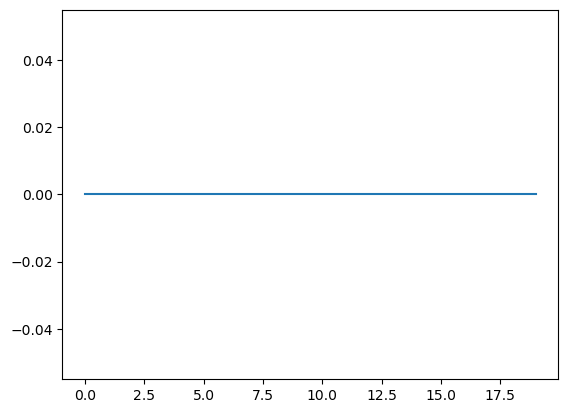

In [1]:
# Weissman score
import math
import matplotlib.pyplot as plt

def weissman(a, r, r_ref, t, t_ref):
    return a * r / r_ref * math.log(t_ref) / math.log(t)

#print(weissman(1, 0.5, 0.8, 0.2, 1))
plt.plot([weissman(1, r/10, 0.5, 0.9, 1) for r in range(20)])
plt.show()

In [2]:
# erosion model via NN

import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import NearestNeighbors
%matplotlib notebook

def spsty(k, x, nbrs):
    '''sparsity at x for k neighbors'''
    dist, ind = nbrs.kneighbors(x)
    return np.sum(dist) / k

modeldim = 144
nshown = 80
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = nshown+1, modeldim, 3, modeldim # 2

word = u'xxxx'  # <--- change this to display a different neighbourhood
word_labels = [word]

close_words = model.wv.most_similar(word, topn=nshown)
arr = np.empty((0, D_in), dtype='f')
arr = np.append(arr, np.array([model.wv[word]]), axis=0)
for wrd_score in close_words:
    wrd_vector = model.wv[wrd_score[0]]
    if not wrd_score[0] in word_labels: # fix double-words
        word_labels.append(wrd_score[0])
    arr = np.append(arr, np.array([wrd_vector]), axis=0)
    
y = range(D_out)

# Randomly initialize weights
w1 = np.random.randn(D_in, H)*0.05
w2 = np.random.randn(H, D_out)*0.05

b1 = np.zeros(H)  # bias
b2 = np.zeros(D_out)

mw1 = np.zeros_like(w1)
mw2 = np.zeros_like(w2)
mb1 = np.zeros_like(b1)
mb2 = np.zeros_like(b2)

learning_rate = 1e-1
for t in range(60):
    # Forward pass: compute predicted y
    h = np.dot(arr, w1) + b1
    h_relu = np.maximum(h, 0)
    #h_relu = softmax(h)
    y_pred = np.dot(h_relu, w2) + b2 # output

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 0:
        print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = (y_pred - y)
    grad_w2 = np.dot(h_relu.T, grad_y_pred) * np.ones_like(w2)  # dw2 = (.) ReLu(h)
    grad_b2 = grad_y_pred
    grad_h_relu = np.dot(grad_y_pred, w2.T)  # dw1 = (.) w2 ReLu'(h) x
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0  # ReLU'
    grad_w1 = np.dot(grad_h.T, arr)
    grad_b1 = np.dot(w2, grad_y_pred.T)

    # Update weights
    for param, dparam, mem in zip([w1, w2, b1, b2], [grad_w1.T, grad_w2, grad_b1.T[0], grad_b2[0]], [mw1, mw2, mb1, mb2]):
        mem += dparam * dparam
        param += -learning_rate * dparam / np.sqrt(mem + 1e-8)  # adagrad update
    
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,7))
xc = []
yc = []
xysz = []
for i in range(nshown):
    xycoord = np.dot(arr[i], w1)
    scalezcoord = np.average(xycoord) / 50
    xc.append(xycoord[0] + random.uniform(-xycoord[2], xycoord[2]) / scalezcoord)  # use 3rd hidden variable to change pos a bit
    yc.append(xycoord[1] + random.uniform(-xycoord[2], xycoord[2]) / scalezcoord)
    xysz.append(model.wv.get_vecattr(close_words[i][0], "count") / 10)
    
for label, x, y in zip(word_labels, xc, yc):
    if label == word:  # make the reference term stand out
        plt.annotate(label, xy=(x, y), xytext=(1, 1), textcoords='offset points', fontsize=12, color='red')
    else:
        plt.annotate(label, xy=(x, y), xytext=(1, 1), textcoords='offset points', fontsize=10)

plt.scatter(xc, yc, s=xysz)
ax = plt.gca()
ax.set_facecolor('white')

plt.show()
#plt.savefig('w2vec cloud 0.png', bbox_inches='tight')


NameError: name 'model' is not defined

In [ ]:

def generateGrid(self):       
        # full grid generation. Start from corners.
        rSize = self.randSize
        startSize = self.landSize
        # set corner values. Tilt: Use higher altitudes for back of grid.
        self.grid[0, 0] = (random.random() - 0.5 + self.tilt * 2) * rSize
        self.grid[0, self.gridSize] = (random.random() - 0.5 + self.tilt * 2) * rSize
        self.grid[self.gridSize, 0] = (random.random() - 0.5 - self.tilt) * rSize
        self.grid[self.gridSize, self.gridSize] = (random.random() - 0.5 - self.tilt) * rSize
            
        # go through grid by adding a mid point first on axis 0 (X), then on axis 1 (Z), as average of end points + a random shift
        # each round the rSize will be halved as the distance between end points (step) is halved as well
        for s in range(startSize, 0, -1):
            halfStep = 2 ** (s - 1)
            step = 2 * halfStep
            # generate mid point in x for each z
            for z in range(0, self.gridSize + 1, step):
                for x in range(step, self.gridSize + 1, step):
                    self.grid[x - halfStep, z] = (self.grid[x - step, z] + self.grid[x, z]) / 2 + (random.random() - 0.5) * rSize
            # generate mid point in z for each x (including the nex x just created, so using halfStep)
            for x in range(0, self.gridSize + 1, halfStep):
                for z in range(step, self.gridSize + 1, step):
                    self.grid[x, z - halfStep] = (self.grid[x, z - step] + self.grid[x, z]) / 2 + (random.random() - 0.5) * rSize
            rSize = rSize / 2
            

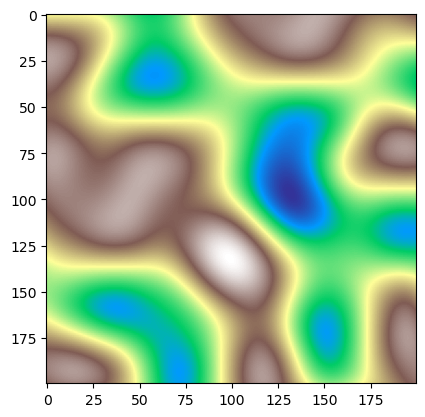

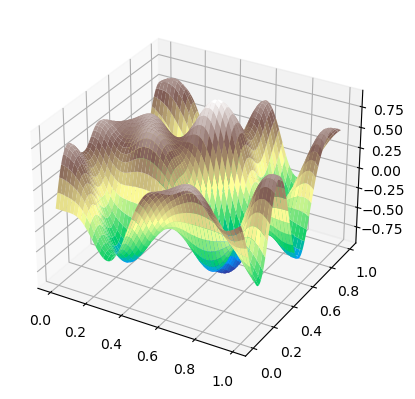

In [15]:

%matplotlib inline
#import noise
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import axes3d

"""Perlin noise -- pure python implementation"""

__version__ = '$Id: perlin.py 521 2008-12-15 03:03:52Z casey.duncan $'

from math import floor, fmod, sqrt
from random import randint

# 3D Gradient vectors
_GRAD3 = ((1,1,0),(-1,1,0),(1,-1,0),(-1,-1,0), 
	(1,0,1),(-1,0,1),(1,0,-1),(-1,0,-1), 
	(0,1,1),(0,-1,1),(0,1,-1),(0,-1,-1),
	(1,1,0),(0,-1,1),(-1,1,0),(0,-1,-1),
) 

# 4D Gradient vectors
_GRAD4 = ((0,1,1,1), (0,1,1,-1), (0,1,-1,1), (0,1,-1,-1), 
	(0,-1,1,1), (0,-1,1,-1), (0,-1,-1,1), (0,-1,-1,-1), 
	(1,0,1,1), (1,0,1,-1), (1,0,-1,1), (1,0,-1,-1), 
	(-1,0,1,1), (-1,0,1,-1), (-1,0,-1,1), (-1,0,-1,-1), 
	(1,1,0,1), (1,1,0,-1), (1,-1,0,1), (1,-1,0,-1), 
	(-1,1,0,1), (-1,1,0,-1), (-1,-1,0,1), (-1,-1,0,-1), 
	(1,1,1,0), (1,1,-1,0), (1,-1,1,0), (1,-1,-1,0), 
	(-1,1,1,0), (-1,1,-1,0), (-1,-1,1,0), (-1,-1,-1,0))

# A lookup table to traverse the simplex around a given point in 4D. 
# Details can be found where this table is used, in the 4D noise method. 
_SIMPLEX = (
	(0,1,2,3),(0,1,3,2),(0,0,0,0),(0,2,3,1),(0,0,0,0),(0,0,0,0),(0,0,0,0),(1,2,3,0), 
	(0,2,1,3),(0,0,0,0),(0,3,1,2),(0,3,2,1),(0,0,0,0),(0,0,0,0),(0,0,0,0),(1,3,2,0), 
	(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0), 
	(1,2,0,3),(0,0,0,0),(1,3,0,2),(0,0,0,0),(0,0,0,0),(0,0,0,0),(2,3,0,1),(2,3,1,0), 
	(1,0,2,3),(1,0,3,2),(0,0,0,0),(0,0,0,0),(0,0,0,0),(2,0,3,1),(0,0,0,0),(2,1,3,0), 
	(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0),(0,0,0,0), 
	(2,0,1,3),(0,0,0,0),(0,0,0,0),(0,0,0,0),(3,0,1,2),(3,0,2,1),(0,0,0,0),(3,1,2,0), 
	(2,1,0,3),(0,0,0,0),(0,0,0,0),(0,0,0,0),(3,1,0,2),(0,0,0,0),(3,2,0,1),(3,2,1,0))

# Simplex skew constants
_F2 = 0.5 * (sqrt(3.0) - 1.0)
_G2 = (3.0 - sqrt(3.0)) / 6.0
_F3 = 1.0 / 3.0
_G3 = 1.0 / 6.0


class BaseNoise:
	"""Noise abstract base class"""

	permutation = (151,160,137,91,90,15, 
		131,13,201,95,96,53,194,233,7,225,140,36,103,30,69,142,8,99,37,240,21,10,23, 
		190,6,148,247,120,234,75,0,26,197,62,94,252,219,203,117,35,11,32,57,177,33, 
		88,237,149,56,87,174,20,125,136,171,168,68,175,74,165,71,134,139,48,27,166, 
		77,146,158,231,83,111,229,122,60,211,133,230,220,105,92,41,55,46,245,40,244, 
		102,143,54,65,25,63,161,1,216,80,73,209,76,132,187,208,89,18,169,200,196, 
		135,130,116,188,159,86,164,100,109,198,173,186,3,64,52,217,226,250,124,123, 
		5,202,38,147,118,126,255,82,85,212,207,206,59,227,47,16,58,17,182,189,28,42, 
		223,183,170,213,119,248,152,2,44,154,163,70,221,153,101,155,167,43,172,9, 
		129,22,39,253,9,98,108,110,79,113,224,232,178,185,112,104,218,246,97,228, 
		251,34,242,193,238,210,144,12,191,179,162,241, 81,51,145,235,249,14,239,107, 
		49,192,214,31,181,199,106,157,184,84,204,176,115,121,50,45,127,4,150,254, 
		138,236,205,93,222,114,67,29,24,72,243,141,128,195,78,66,215,61,156,180)
	
	period = len(permutation)

	# Double permutation array so we don't need to wrap
	permutation = permutation * 2

	def __init__(self, period=None, permutation_table=None):
		"""Initialize the noise generator. With no arguments, the default
		period and permutation table are used (256). The default permutation
		table generates the exact same noise pattern each time.
		
		An integer period can be specified, to generate a random permutation
		table with period elements. The period determines the (integer)
		interval that the noise repeats, which is useful for creating tiled
		textures.  period should be a power-of-two, though this is not
		enforced. Note that the speed of the noise algorithm is indpendent of
		the period size, though larger periods mean a larger table, which
		consume more memory.

		A permutation table consisting of an iterable sequence of whole
		numbers can be specified directly. This should have a power-of-two
		length. Typical permutation tables are a sequnce of unique integers in
		the range [0,period) in random order, though other arrangements could
		prove useful, they will not be "pure" simplex noise. The largest
		element in the sequence must be no larger than period-1.

		period and permutation_table may not be specified together.
		"""
		if period is not None and permutation_table is not None:
			raise ValueError(
				'Can specify either period or permutation_table, not both')
		if period is not None:
			self.randomize(period)
		elif permutation_table is not None:
			self.permutation = tuple(permutation_table) * 2
			self.period = len(permutation_table)

	def randomize(self, period=None):
		"""Randomize the permutation table used by the noise functions. This
		makes them generate a different noise pattern for the same inputs.
		"""
		if period is not None:
			self.period = period
		perm = list(range(self.period))
		perm_right = self.period - 1
		for i in list(perm):
			j = randint(0, perm_right)
			perm[i], perm[j] = perm[j], perm[i]
		self.permutation = tuple(perm) * 2


class SimplexNoise(BaseNoise):
	"""Perlin simplex noise generator

	Adapted from Stefan Gustavson's Java implementation described here:

	http://staffwww.itn.liu.se/~stegu/simplexnoise/simplexnoise.pdf

	To summarize:

	"In 2001, Ken Perlin presented 'simplex noise', a replacement for his classic
	noise algorithm.  Classic 'Perlin noise' won him an academy award and has
	become an ubiquitous procedural primitive for computer graphics over the
	years, but in hindsight it has quite a few limitations.  Ken Perlin himself
	designed simplex noise specifically to overcome those limitations, and he
	spent a lot of good thinking on it. Therefore, it is a better idea than his
	original algorithm. A few of the more prominent advantages are: 

	* Simplex noise has a lower computational complexity and requires fewer
	  multiplications. 
	* Simplex noise scales to higher dimensions (4D, 5D and up) with much less
	  computational cost, the complexity is O(N) for N dimensions instead of 
	  the O(2^N) of classic Noise. 
	* Simplex noise has no noticeable directional artifacts.  Simplex noise has 
	  a well-defined and continuous gradient everywhere that can be computed 
	  quite cheaply. 
	* Simplex noise is easy to implement in hardware."
	"""

	def noise2(self, x, y):
		"""2D Perlin simplex noise. 
		
		Return a floating point value from -1 to 1 for the given x, y coordinate. 
		The same value is always returned for a given x, y pair unless the
		permutation table changes (see randomize above). 
		"""
		# Skew input space to determine which simplex (triangle) we are in
		s = (x + y) * _F2
		i = floor(x + s)
		j = floor(y + s)
		t = (i + j) * _G2
		x0 = x - (i - t) # "Unskewed" distances from cell origin
		y0 = y - (j - t)

		if x0 > y0:
			i1 = 1; j1 = 0 # Lower triangle, XY order: (0,0)->(1,0)->(1,1)
		else:
			i1 = 0; j1 = 1 # Upper triangle, YX order: (0,0)->(0,1)->(1,1)
		
		x1 = x0 - i1 + _G2 # Offsets for middle corner in (x,y) unskewed coords
		y1 = y0 - j1 + _G2
		x2 = x0 + _G2 * 2.0 - 1.0 # Offsets for last corner in (x,y) unskewed coords
		y2 = y0 + _G2 * 2.0 - 1.0

		# Determine hashed gradient indices of the three simplex corners
		perm = self.permutation
		ii = int(i) % self.period
		jj = int(j) % self.period
		gi0 = perm[ii + perm[jj]] % 12
		gi1 = perm[ii + i1 + perm[jj + j1]] % 12
		gi2 = perm[ii + 1 + perm[jj + 1]] % 12

		# Calculate the contribution from the three corners
		tt = 0.5 - x0**2 - y0**2
		if tt > 0:
			g = _GRAD3[gi0]
			noise = tt**4 * (g[0] * x0 + g[1] * y0)
		else:
			noise = 0.0
		
		tt = 0.5 - x1**2 - y1**2
		if tt > 0:
			g = _GRAD3[gi1]
			noise += tt**4 * (g[0] * x1 + g[1] * y1)
		
		tt = 0.5 - x2**2 - y2**2
		if tt > 0:
			g = _GRAD3[gi2]
			noise += tt**4 * (g[0] * x2 + g[1] * y2)

		return noise * 70.0 # scale noise to [-1, 1]

	def noise3(self, x, y, z):
		"""3D Perlin simplex noise. 
		
		Return a floating point value from -1 to 1 for the given x, y, z coordinate. 
		The same value is always returned for a given x, y, z pair unless the
		permutation table changes (see randomize above).
		"""
		# Skew the input space to determine which simplex cell we're in
		s = (x + y + z) * _F3
		i = floor(x + s)
		j = floor(y + s)
		k = floor(z + s)
		t = (i + j + k) * _G3
		x0 = x - (i - t) # "Unskewed" distances from cell origin
		y0 = y - (j - t)
		z0 = z - (k - t)

		# For the 3D case, the simplex shape is a slightly irregular tetrahedron. 
		# Determine which simplex we are in. 
		if x0 >= y0:
			if y0 >= z0:
				i1 = 1; j1 = 0; k1 = 0
				i2 = 1; j2 = 1; k2 = 0
			elif x0 >= z0:
				i1 = 1; j1 = 0; k1 = 0
				i2 = 1; j2 = 0; k2 = 1
			else:
				i1 = 0; j1 = 0; k1 = 1
				i2 = 1; j2 = 0; k2 = 1
		else: # x0 < y0
			if y0 < z0:
				i1 = 0; j1 = 0; k1 = 1
				i2 = 0; j2 = 1; k2 = 1
			elif x0 < z0:
				i1 = 0; j1 = 1; k1 = 0
				i2 = 0; j2 = 1; k2 = 1
			else:
				i1 = 0; j1 = 1; k1 = 0
				i2 = 1; j2 = 1; k2 = 0
		
		# Offsets for remaining corners
		x1 = x0 - i1 + _G3
		y1 = y0 - j1 + _G3
		z1 = z0 - k1 + _G3
		x2 = x0 - i2 + 2.0 * _G3
		y2 = y0 - j2 + 2.0 * _G3
		z2 = z0 - k2 + 2.0 * _G3
		x3 = x0 - 1.0 + 3.0 * _G3
		y3 = y0 - 1.0 + 3.0 * _G3
		z3 = z0 - 1.0 + 3.0 * _G3

		# Calculate the hashed gradient indices of the four simplex corners
		perm = self.permutation
		ii = int(i) % self.period
		jj = int(j) % self.period
		kk = int(k) % self.period
		gi0 = perm[ii + perm[jj + perm[kk]]] % 12
		gi1 = perm[ii + i1 + perm[jj + j1 + perm[kk + k1]]] % 12
		gi2 = perm[ii + i2 + perm[jj + j2 + perm[kk + k2]]] % 12
		gi3 = perm[ii + 1 + perm[jj + 1 + perm[kk + 1]]] % 12

		# Calculate the contribution from the four corners
		noise = 0.0
		tt = 0.6 - x0**2 - y0**2 - z0**2
		if tt > 0:
			g = _GRAD3[gi0]
			noise = tt**4 * (g[0] * x0 + g[1] * y0 + g[2] * z0)
		else:
			noise = 0.0
		
		tt = 0.6 - x1**2 - y1**2 - z1**2
		if tt > 0:
			g = _GRAD3[gi1]
			noise += tt**4 * (g[0] * x1 + g[1] * y1 + g[2] * z1)
		
		tt = 0.6 - x2**2 - y2**2 - z2**2
		if tt > 0:
			g = _GRAD3[gi2]
			noise += tt**4 * (g[0] * x2 + g[1] * y2 + g[2] * z2)
		
		tt = 0.6 - x3**2 - y3**2 - z3**2
		if tt > 0:
			g = _GRAD3[gi3]
			noise += tt**4 * (g[0] * x3 + g[1] * y3 + g[2] * z3)
		
		return noise * 32.0


def lerp(t, a, b):
	return a + t * (b - a)

def grad3(hash, x, y, z):
	g = _GRAD3[hash % 16]
	return x*g[0] + y*g[1] + z*g[2]


class TileableNoise(BaseNoise):
	"""Tileable implemention of Perlin "improved" noise. This
	is based on the reference implementation published here:
	
	http://mrl.nyu.edu/~perlin/noise/
	"""

	def noise3(self, x, y, z, repeat, base=0.0):
		"""Tileable 3D noise.
		
		repeat specifies the integer interval in each dimension 
		when the noise pattern repeats.
		
		base allows a different texture to be generated for
		the same repeat interval.
		"""
		i = int(fmod(floor(x), repeat))
		j = int(fmod(floor(y), repeat))
		k = int(fmod(floor(z), repeat))
		ii = (i + 1) % repeat
		jj = (j + 1) % repeat
		kk = (k + 1) % repeat
		if base:
			i += base; j += base; k += base
			ii += base; jj += base; kk += base

		x -= floor(x); y -= floor(y); z -= floor(z)
		fx = x**3 * (x * (x * 6 - 15) + 10)
		fy = y**3 * (y * (y * 6 - 15) + 10)
		fz = z**3 * (z * (z * 6 - 15) + 10)

		perm = self.permutation
		A = perm[i]
		AA = perm[A + j]
		AB = perm[A + jj]
		B = perm[ii]
		BA = perm[B + j]
		BB = perm[B + jj]
		
		return lerp(fz, lerp(fy, lerp(fx, grad3(perm[AA + k], x, y, z),
										  grad3(perm[BA + k], x - 1, y, z)),
								 lerp(fx, grad3(perm[AB + k], x, y - 1, z),
										  grad3(perm[BB + k], x - 1, y - 1, z))),
						lerp(fy, lerp(fx, grad3(perm[AA + kk], x, y, z - 1),
										  grad3(perm[BA + kk], x - 1, y, z - 1)),
								 lerp(fx, grad3(perm[AB + kk], x, y - 1, z - 1),
										  grad3(perm[BB + kk], x - 1, y - 1, z - 1))))

shape = (200, 200)
scale = 100.0
octaves = 6
persistence = 0.5
lacunarity = 2.0

world = np.zeros(shape)
bn = SimplexNoise()
bn.randomize()

for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = bn.noise2(i/scale, 
                                    j/scale, 
                                    #octaves=octaves, 
                                    #persistence=persistence, 
                                    #lacunarity=lacunarity, 
                                    #repeatx=1024, 
                                    #repeaty=1024, 
                                    #base=42)
                               )
        
matplotlib.pyplot.imshow(world, cmap='terrain')

lin_x = np.linspace(0,1,shape[0],endpoint=False)
lin_y = np.linspace(0,1,shape[1],endpoint=False)
x,y = np.meshgrid(lin_x,lin_y)
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x,y,world,cmap='terrain')

In [1]:
# Hashad series

def hashad(n):
    res = []
    for h in range(1, n+1):
        if h % sum([int(k) for k in str(h)]) == 0:
            res.append(h)
    return res

print(hashad(100))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 18, 20, 21, 24, 27, 30, 36, 40, 42, 45, 48, 50, 54, 60, 63, 70, 72, 80, 81, 84, 90, 100]


In [8]:
[k for k in str(12345)]

['1', '2', '3', '4', '5']

In [ ]:
# HCPs webscraping II
import requests
import sys
import os
import webbrowser
import bs4
import time
import random
import json
from collections import namedtuple
import csv
import re

def getres(url): # get request http://docs.python-requests.org/en/master/user/quickstart/
    try:
        return requests.get(url, timeout=10.0)
    except Exception as e:
        msg = "Exception is:\n %s \n" % e
        print(msg)
        resf = namedtuple('res', 'content status_code')
        pt1 = resf('', 204)
        return resf # return a failed request

def __unicode__(self):
    return unicode(self.some_field) or u''
    
def main():
    '''read hcp directory'''
    
    ddataline = namedtuple('ddataline', 'dist address zipc tel')
    
    class ddataline:
        dist = ''
        address = ''
        zipc = ''
        tel = ''
        
        def __init__(self, vlst):
            self.dist = vlst[0]
            self.address = vlst[1]
            self.zipc = vlst[2]
            if len(vlst) > 3:
                self.tel = vlst[3]
        def get_vals(self):
            return [self.address, self.zipc, self.tel]  # deliberately omitting dist (not used)
                    
    outtext = ''
    regions = ['1010']
    print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'requesting data from site...')    
        
    results = []
    hcp_names = {}
    hcp_details = {}
    headers = {
        'origin': 'https://arztsuche.aeksbg.at',
        'referer': 'https://arztsuche.aeksbg.at/finder/search/land/SA,OO,BL',
        'content-type': 'application/json',
          }
    
    for current_regio in regions:
        if pgctr == 0:
            # https://arztsuche.aeksbg.at/finder/search/land/SA,OO,BL

            url = 'https://arztsuche.aeksbg.at/backend//nextdoor/getNextdoorResults'
            payload = {
                "bezirke":405,
                "trackingString":";;;Eferding;;;;;;;;;;;;;;;;;;",
                "lands":["SA","OO","BL"]
            }

            r = requests.post(url, data=json.dumps(payload), headers=headers)
            data = r.json()

        if res.status_code == 200:
            print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'processing page...')
            exsoup = bs4.BeautifulSoup(res.text, 'html.parser')
            elems = exsoup.find_all('font')
            if elems is not None:
                #print('******************', elems)
                for idx, elem in enumerate(elems):
                    #print('+++++++++++++ IDX: ', idx, elem.text)
                    hcp_names[current_zip + str(pgctr) + str(idx)] = elem.text
            elems = exsoup.find_all('img', width="16px")
            if elems is not None:
                for idx, elem in enumerate(elems):
                    #print('******* IDX: ', idx, elem.next_element)
                    this_detail = re.sub('\n\t\t', '', elem.next_element)
                    # '101000': '0 km, Volksgartenstraße 3/Top2, A-1010, Tel +43-676-7438445'
                    hcp_details[current_zip + str(pgctr) + str(idx)] = ddataline(this_detail.split(','))

        time.sleep(random.randint(1, 2)) # wait a few seconds

    res = {}
    for this_hcp_key in hcp_names:
        res[this_hcp_key] = (hcp_names[this_hcp_key], hcp_details[this_hcp_key].get_vals())
    
    print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'saving files...')
    os.chdir(r'D:\DL\lrgtxt0')
    with open('hcpdata.csv', 'w', newline='') as csvfile:
        #csvwrtr = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        csvwrtr = csv.writer(csvfile, delimiter=',')
        for row in res:
            csvwrtr.writerow(row)
    
    print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'completed!')
    
if __name__=="__main__":
    main()

In [17]:
# request with payload https://stackoverflow.com/questions/10768522/python-send-post-with-header
import requests
import json

url = 'https://arztsuche.aeksbg.at/backend//nextdoor/getNextdoorResults'
payload = {
    "bezirke":405,
    "trackingString":";;;Eferding;;;;;;;;;;;;;;;;;;",
    "lands":["SA","OO","BL"]
}

#headers = {}
headers = {
    'origin': 'https://arztsuche.aeksbg.at',
    'referer': 'https://arztsuche.aeksbg.at/finder/search/land/SA,OO,BL',
    'content-type': 'application/json',
          }
r = requests.post(url, data=json.dumps(payload), headers=headers)
#print(r.content)
data = r.json()
print(data)

[{'id': 12777, 'bezeichnung': 'Gruppenpraxis für Allgemeinmedizin Dr. Hörtenhuber & Dr. Linzner OG', 'bezeichnung2': '', 'gemeinde_id': 40501, 'plz': '4072', 'ort': 'Alkoven', 'strasse': 'Alte Hauptstraße 1', 'email_standort': 'ordination-alkoven@outlook.com', 'homepage_standort': None, 'telefon': None, 'mobiltelefon': None, 'fax': None, 'hausapotheke': 0, 'gemeindearzt': 1, 'fixe_ordinationszeiten': 1, 'nach_vereinbarung': 0, 'darueber_nach_vereinbarung': 1, 'gruppenpraxis': 1, 'vu': 1, 'movovon': '07:30:00', 'movobis': '11:00:00', 'monavon': '17:00:00', 'monabis': '18:30:00', 'divobis': '11:00:00', 'dinavon': None, 'dinabis': None, 'mivovon': '07:30:00', 'mivobis': '11:00:00', 'minavon': '17:00:00', 'minabis': '18:30:00', 'dovobis': None, 'donavon': None, 'donabis': None, 'frvovon': '07:30:00', 'frvobis': '11:00:00', 'frnavon': None, 'frnabis': None, 'savovon': '07:30:00', 'savobis': '11:00:00', 'sanavon': None, 'sanabis': None, 'sovovon': None, 'sovobis': None, 'sonavon': None, 'son

In [1]:
# NÖ https://www.arztnoe.at/arztsuche/10002
import requests
import json

# req url https://www.arztnoe.at/api/cellent-arztsuche/arzt
# headers: Origin: https://www.arztnoe.at Referer https://www.arztnoe.at/
# payload: search%5BfullText%5D=&search%5Blocation%5D=&filter%5BradialSearchErrorCurrentPosition%5D=true&page=1&context=list
# just pageno changes, response is json

url = 'https://www.arztnoe.at/api/cellent-arztsuche/arzt'
payload = {
    "page":1,
    "context":"list",
}
headers = {
    'Origin': 'https://www.arztnoe.at',
    'Referer': 'https://www.arztnoe.at',
          }
r = requests.post(url, data=json.dumps(payload), headers=headers)
#print(r.content)
data = r.json()
print(data)

{'aRecord': [{'uid': '18334', 'title': 'Dr. Ahmed Magdy ABDEL AAL', 'kontakt': [], 'abwesenheit': [], 'ordinationen': [], 'anstellungen': {'UK Krems - Abteilung für Urologie': {'dienstgeber': 'UK Krems - Abteilung für Urologie', 'fachbezeichnung': ['Urologie']}}, 'anerkennungen': ['Facharzt für Urologie']}, {'uid': '20076', 'title': 'Dr. med. dent. Sarah ABDEL-HAMIED', 'kontakt': [], 'abwesenheit': [], 'ordinationen': [], 'anstellungen': [], 'anerkennungen': []}, {'uid': '10453', 'title': 'Dr. Ahmadolla ABDELRAHIMSAI', 'kontakt': [], 'abwesenheit': [], 'ordinationen': [{'bezeichnung': 'Ordination Dr. Ahmadolla ABDELRAHIMSAI', 'typ': 'N', 'strasse': 'Lagerhausstraße', 'hausNr': '6', 'plz': '2230', 'ort': 'GÄNSERNDORF', 'ntext': None, 'ordKassen': '', 'ordinationFach': ['Allgemeinmedizin', 'Physikalische Medizin und allgemeine Rehabilitation'], 'ordZeiten': {'showInfo': 0, 'timeToOpening': '', 'modifier': ''}}], 'anstellungen': [], 'anerkennungen': ['Arzt für Allgemeinmedizin', 'Facharzt

In [18]:
# Stmk https://www.aekstmk.or.at/cms/cms.php?spam=634fdbfa33b88&referer=%2Fcms%2Fcms.php%3FpageName%3D46&search=search&pageName=46&fachgruppe=0&bezirk=0&arztname=&kassa=0&diplom=0&zusfach=0&spezialisierung=0&geschlecht=&sprache=0&vis=15
import requests
import sys
import os
import webbrowser
import bs4
import time
import random
import json
from collections import namedtuple
import csv
import re

def getres(url): # get request http://docs.python-requests.org/en/master/user/quickstart/
    try:
        return requests.get(url, timeout=10.0)
    except Exception as e:
        msg = "Exception is:\n %s \n" % e
        print(msg)
        resf = namedtuple('res', 'content status_code')
        pt1 = resf('', 204)
        return resf # return a failed request

def __unicode__(self):
    return unicode(self.some_field) or u''
    
def main():
    '''read hcp directory'''
    
    ddataline = namedtuple('ddataline', 'dist address zipc tel')
    
    class ddataline:
        dist = ''
        address = ''
        zipc = ''
        tel = ''
        
        def __init__(self, vlst):
            self.dist = vlst[0]
            self.address = vlst[1]
            self.zipc = vlst[2]
            if len(vlst) > 3:
                self.tel = vlst[3]
        def get_vals(self):
            return [self.address, self.zipc, self.tel]  # deliberately omitting dist (not used)
                    
    outtext = ''
    print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'requesting data from site...')    
        
    results = []
    hcp_names = {}
    hcp_tel = {}
    hcp_adr = {}
    
# <div class="bez_content vis ">
#<div class="bgblue">
#<span class="aef_result_310 bgblue" style="text-align:left;">&nbsp;  <a href="/46?arztnr=9355&amp;rfolge=1&amp;referer=%2Fcms%2Fcms.php%3Fspam%3D634fdbfa33b88%26referer%3D%252Fcms%252Fcms.php%253FpageName%253D46%26search%3Dsearch%26pageName%3D46%26fachgruppe%3D0%26bezirk%3D0%26arztname%3D%26kassa%3D0%26diplom%3D0%26zusfach%3D0%26spezialisierung%3D0%26geschlecht%3D%26sprache%3D0%26vis%3D15">Achtschin, Dieter</a>
#</span>
#<span class="aef_result_310r bgblue">+43(3152)37026&nbsp;</span>  	 <span class="aef_result_620 bgblue" style="height: 18px;padding:0px;text-align:left">&nbsp; 	 Torplatz 1, 8330 Feldbach </span>
#</div>
    
    res = getres('https://www.aekstmk.or.at/46?spam=6364e66aed875&referer=%2F46&search=search&pageName=46&fachgruppe=0&bezirk=0&arztname=&kassa=0&diplom=0&zusfach=0&spezialisierung=0&geschlecht=&sprache=0')
    if res.status_code == 200:
        print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'processing page...')
        exsoup = bs4.BeautifulSoup(res.text, 'html.parser')
        elems = exsoup.find_all(class_ = 'aef_result_310 bgblue')
        if elems is not None:
            #print('******************', elems)
            for idx, elem in enumerate(elems):
                #print('+++++++++++++ IDX name: ', idx, elem.text)
                this_detail = re.sub('\xa0', '', elem.text)
                this_detail = re.sub('\n', '', this_detail)
                hcp_names[idx] = this_detail
        elems = exsoup.find_all(class_ = 'aef_result_310r bgblue')
        if elems is not None:
            for idx, elem in enumerate(elems):
                #print('******* IDX tel: ', idx, elem.next_element)
                this_detail = re.sub('\xa0', '', elem.text)
                hcp_tel[idx] = this_detail
        elems = exsoup.find_all(class_ = 'aef_result_620 bgblue')
        if elems is not None:
            for idx, elem in enumerate(elems):
                #print('******* IDX addr: ', idx, elem.next_element)
                this_detail = re.sub('\xa0', '', elem.text)
                this_detail = re.sub('\t', '', this_detail)
                hcp_adr[idx] = this_detail

    time.sleep(random.randint(1, 2)) # wait a few seconds

    res = {}
    for this_hcp_key in hcp_names:
        res[this_hcp_key] = (hcp_names[this_hcp_key], hcp_tel[this_hcp_key], hcp_adr[this_hcp_key])
    
    print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'saving files...')
    os.chdir(r'D:\DL\lrgtxt0')
    with open('hcpdata_str.csv', 'w', newline='') as csvfile:
        #csvwrtr = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        csvwrtr = csv.writer(csvfile, delimiter=',')
        for key_row, row in res.items():
            csvwrtr.writerow(row)
    
    print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'completed!')
    
if __name__=="__main__":
    main()



Sat, 05 Nov 2022 17:02:57 requesting data from site...
Sat, 05 Nov 2022 17:02:58 processing page...
Sat, 05 Nov 2022 17:02:59 saving files...
Sat, 05 Nov 2022 17:02:59 completed!


In [6]:
# Ktn https://www.aekktn.at/arztsuche?vorname=&nachname=&geschlecht=*&ordinationszeiten=0&ordinationszeit_1_type=0&ordinationszeit_1_time1=000&ordinationszeit_1_time2=100&ordinationszeit_2_type=0&ordinationszeit_2_time1=000&ordinationszeit_2_time2=100&ordinationszeit_3_type=0&ordinationszeit_3_time1=000&ordinationszeit_3_time2=100&ordinationszeit_4_type=0&ordinationszeit_4_time1=000&ordinationszeit_4_time2=100&ordinationszeit_5_type=0&ordinationszeit_5_time1=000&ordinationszeit_5_time2=100&ordinationszeit_6_type=0&ordinationszeit_6_time1=000&ordinationszeit_6_time2=100&ordinationszeit_7_type=0&ordinationszeit_7_time1=000&ordinationszeit_7_time2=100&vorsorgeuntersuchung=0&covid_impfungen=&sort=0&suchen=Suche+starten
# one long result list
import requests
import sys
import os
import webbrowser
import bs4
import time
import random
import json
from collections import namedtuple
import csv
import re

def getres(url): # get request http://docs.python-requests.org/en/master/user/quickstart/
    try:
        return requests.get(url, timeout=10.0)
    except Exception as e:
        msg = "Exception is:\n %s \n" % e
        print(msg)
        resf = namedtuple('res', 'content status_code')
        pt1 = resf('', 204)
        return resf # return a failed request

def __unicode__(self):
    return unicode(self.some_field) or u''
    
def main():
    '''read hcp directory'''
    
    ddataline = namedtuple('ddataline', 'dist address zipc tel')
    
    class ddataline:
        dist = ''
        address = ''
        zipc = ''
        tel = ''
        
        def __init__(self, vlst):
            self.dist = vlst[0]
            self.address = vlst[1]
            self.zipc = vlst[2]
            if len(vlst) > 3:
                self.tel = vlst[3]
        def get_vals(self):
            return [self.address, self.zipc, self.tel]  # deliberately omitting dist (not used)
                    
    outtext = ''
    print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'requesting data from site...')    
        
    results = []
    hcp_names = {}
    hcp_details = {}
    
    # <tr><td><a href="?ordination=3765-137650" title=" Dr. Eveline Achatz " 
    #class="name-link name-width boldable"> Dr. Eveline Achatz </a></td><td>Kroneplatz 1</td><td>9020 Klagenfurt</td></tr>
    res = getres('https://www.aekktn.at/arztsuche?vorname=&nachname=&geschlecht=*&ordinationszeiten=0&ordinationszeit_1_type=0&ordinationszeit_1_time1=000&ordinationszeit_1_time2=100&ordinationszeit_2_type=0&ordinationszeit_2_time1=000&ordinationszeit_2_time2=100&ordinationszeit_3_type=0&ordinationszeit_3_time1=000&ordinationszeit_3_time2=100&ordinationszeit_4_type=0&ordinationszeit_4_time1=000&ordinationszeit_4_time2=100&ordinationszeit_5_type=0&ordinationszeit_5_time1=000&ordinationszeit_5_time2=100&ordinationszeit_6_type=0&ordinationszeit_6_time1=000&ordinationszeit_6_time2=100&ordinationszeit_7_type=0&ordinationszeit_7_time1=000&ordinationszeit_7_time2=100&vorsorgeuntersuchung=0&covid_impfungen=&sort=0&suchen=Suche+starten')
    if res.status_code == 200:
        print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'processing page...')
        exsoup = bs4.BeautifulSoup(res.text, 'html.parser')
        elems = exsoup.find_all(class_ = 'name-link name-width boldable')
        if elems is not None:
            #print('******************', elems)
            for idx, elem in enumerate(elems):
                #print('+++++++++++++ IDX name: ', idx, elem.text, elem.next_element.text, elem.next_element.next_element.text, elem.next_element.next_element.next_element.text, elem.next_element.next_element.next_element.next_element.text)
                hcp_names[idx] = elem.text
                hcp_details[idx] = elem.next_element.next_element.text + ', ' + elem.next_element.next_element.next_element.next_element.text

    time.sleep(random.randint(1, 2)) # wait a few seconds

    res = {}
    for this_hcp_key in hcp_names:
        res[this_hcp_key] = (hcp_names[this_hcp_key], hcp_details[this_hcp_key])
    
    print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'saving files...')
    os.chdir(r'D:\DL\lrgtxt0')
    with open('hcpdata_Ktn.csv', 'w', newline='') as csvfile:
        #csvwrtr = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        csvwrtr = csv.writer(csvfile, delimiter=',')
        for key_row, row in res.items():
            csvwrtr.writerow(row)
    
    print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'completed!')
    
if __name__=="__main__":
    main()


Sun, 06 Nov 2022 09:47:47 requesting data from site...
Sun, 06 Nov 2022 09:47:47 processing page...
Sun, 06 Nov 2022 09:47:48 saving files...
Sun, 06 Nov 2022 09:47:48 completed!


In [89]:
# Vbg https://www.medicus-online.at/aek/dist/medicus.html#ergebnisfeld_inhalt
import requests
import sys
import os
import webbrowser
import bs4
import time
import random
import json
from collections import namedtuple
import csv
import re

'''<div id="arzt-996" class="col-xl-6 col-lg-12 col-md-12 col-sm-12 col-12 odd">
        
        <div class="vcard card row flex-row shadow mb-4 mx-0">
            <div class="col-md-2 p-0">
                <figure class="figure person m-3">
                    <img class="img-fluid rounded-circle" src="../medicus/Medicus?action=jpegPhoto&amp;id=996" width="300" height="300" alt="">
                </figure>
            </div>
            <div class="col-md-10 pt-3 pr-0 pb-0 pl-3">
                <p class="h4 mb-0">
                    Herr Dr. med. Beck <span class="text-secondary">Joachim</span> 
                    <span style="float: right; margin-right: 20px;">
                        <a style="color: rgba(0,0,0,0)" title="Permalink" href="../dist/praxis-996-O2.html">@</a>
                    </span>
                </p>
                <p class="jobTitle">
                    
                    <em>Facharzt für Allgemeinchirurgie und Viszeralchirurgie</em>
                    
                </p>
                <div class="row">
                    <div class="col-12 col-xl-12 col-lg-6 col-md-6 col-sm-12">
                        <div class="address">
                            <address>
                                
                                <p>
                                    <i class="mr-2" data-fa-i2svg=""><svg class="svg-inline--fa fa-thumbtack fa-w-12" aria-hidden="true" focusable="false" data-prefix="fas" data-icon="thumbtack" role="img" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 384 512" data-fa-i2svg=""><path fill="currentColor" d="M298.028 214.267L285.793 96H328c13.255 0 24-10.745 24-24V24c0-13.255-10.745-24-24-24H56C42.745 0 32 10.745 32 24v48c0 13.255 10.745 24 24 24h42.207L85.972 214.267C37.465 236.82 0 277.261 0 328c0 13.255 10.745 24 24 24h136v104.007c0 1.242.289 2.467.845 3.578l24 48c2.941 5.882 11.364 5.893 14.311 0l24-48a8.008 8.008 0 0 0 .845-3.578V352h136c13.255 0 24-10.745 24-24-.001-51.183-37.983-91.42-85.973-113.733z"></path></svg></i><span>Waldfriedgasse 6, Villa Menti</span><br>
                                </p>
                                <p>
                                    <i class="mr-2" style="color: rgba(0,0,0,0);" data-fa-i2svg=""><svg class="svg-inline--fa fa-thumbtack fa-w-12" aria-hidden="true" focusable="false" data-prefix="fas" data-icon="thumbtack" role="img" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 384 512" data-fa-i2svg=""><path fill="currentColor" d="M298.028 214.267L285.793 96H328c13.255 0 24-10.745 24-24V24c0-13.255-10.745-24-24-24H56C42.745 0 32 10.745 32 24v48c0 13.255 10.745 24 24 24h42.207L85.972 214.267C37.465 236.82 0 277.261 0 328c0 13.255 10.745 24 24 24h136v104.007c0 1.242.289 2.467.845 3.578l24 48c2.941 5.882 11.364 5.893 14.311 0l24-48a8.008 8.008 0 0 0 .845-3.578V352h136c13.255 0 24-10.745 24-24-.001-51.183-37.983-91.42-85.973-113.733z"></path></svg></i>
                                    <span>6800</span>&nbsp;<span>Feldkirch</span>
                                </p>
                                
                            </address>
                        </div>
                        <p>
                            
                            <i class="mr-2" data-fa-i2svg=""><svg class="svg-inline--fa fa-phone fa-w-16" aria-hidden="true" focusable="false" data-prefix="fas" data-icon="phone" role="img" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 512 512" data-fa-i2svg=""><path fill="currentColor" d="M493.4 24.6l-104-24c-11.3-2.6-22.9 3.3-27.5 13.9l-48 112c-4.2 9.8-1.4 21.3 6.9 28l60.6 49.6c-36 76.7-98.9 140.5-177.2 177.2l-49.6-60.6c-6.8-8.3-18.2-11.1-28-6.9l-112 48C3.9 366.5-2 378.1.6 389.4l24 104C27.1 504.2 36.7 512 48 512c256.1 0 464-207.5 464-464 0-11.2-7.7-20.9-18.6-23.4z"></path></svg></i><a href="tel:05522 31546"><span>05522 31546</span></a>
                            &nbsp;
                        </p>
                    </div>
                    <div class="col-12 col-xl-12 col-lg-6 col-md-6 col-sm-12 pl-md-0 pl-xl-3">
                        <p>
                            
                            <i class="mr-2" data-fa-i2svg=""><svg class="svg-inline--fa fa-envelope fa-w-16" aria-hidden="true" focusable="false" data-prefix="far" data-icon="envelope" role="img" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 512 512" data-fa-i2svg=""><path fill="currentColor" d="M464 64H48C21.49 64 0 85.49 0 112v288c0 26.51 21.49 48 48 48h416c26.51 0 48-21.49 48-48V112c0-26.51-21.49-48-48-48zm0 48v40.805c-22.422 18.259-58.168 46.651-134.587 106.49-16.841 13.247-50.201 45.072-73.413 44.701-23.208.375-56.579-31.459-73.413-44.701C106.18 199.465 70.425 171.067 48 152.805V112h416zM48 400V214.398c22.914 18.251 55.409 43.862 104.938 82.646 21.857 17.205 60.134 55.186 103.062 54.955 42.717.231 80.509-37.199 103.053-54.947 49.528-38.783 82.032-64.401 104.947-82.653V400H48z"></path></svg></i> <a href="mailto:joachim-beck@catv.rol.ch">joachim-beck@catv.rol.ch</a>
                            &nbsp;
                        </p>
                        <p>
                            &nbsp;
                        </p>
                    </div>
                    
                    <div class="col-12">
                        
                        <div class="accordion" id="address996">
                            <p title="Öffnungszeiten anzeigen" class="collapsed" data-toggle="collapse" data-target="#collapse996" aria-expanded="false" aria-controls="collapse19">
                                <i class="mr-2" data-fa-i2svg=""><svg class="svg-inline--fa fa-clock fa-w-16" aria-hidden="true" focusable="false" data-prefix="far" data-icon="clock" role="img" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 512 512" data-fa-i2svg=""><path fill="currentColor" d="M256 8C119 8 8 119 8 256s111 248 248 248 248-111 248-248S393 8 256 8zm0 448c-110.5 0-200-89.5-200-200S145.5 56 256 56s200 89.5 200 200-89.5 200-200 200zm61.8-104.4l-84.9-61.7c-3.1-2.3-4.9-5.9-4.9-9.7V116c0-6.6 5.4-12 12-12h32c6.6 0 12 5.4 12 12v141.7l66.8 48.6c5.4 3.9 6.5 11.4 2.6 16.8L334.6 349c-3.9 5.3-11.4 6.5-16.8 2.6z"></path></svg></i>

                                
                                Heute keine Ordination<span class="sr-only">, Keine Öffnungszeiten vorhanden</span>
                                
                            </p>
                            <div id="collapse996" class="collapse description" aria-labelledby="headingOne" data-parent="#address996">
                                <div class="table-responsive">
                                    
                                </div>
                            </div>
                        </div>
                        
                    </div>
                    
                </div>
            </div>
            <div class="col-md-12 px-0">
                <hr class="offset-md-2">
                <div class="accordion" id="addressdescription_13">
                    <p class="vtgdb-onclick-docdetails text-uppercase collapsed offset-md-2 px-3" data-vtgdb-id="996" data-vtgdb-ocode="O2" data-toggle="collapse" data-target="#details_13" aria-expanded="false" aria-controls="details_13">
                        <i class="mr-2" data-fa-i2svg=""><svg class="svg-inline--fa fa-info fa-w-6" aria-hidden="true" focusable="false" data-prefix="fa" data-icon="info" role="img" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 192 512" data-fa-i2svg=""><path fill="currentColor" d="M20 424.229h20V279.771H20c-11.046 0-20-8.954-20-20V212c0-11.046 8.954-20 20-20h112c11.046 0 20 8.954 20 20v212.229h20c11.046 0 20 8.954 20 20V492c0 11.046-8.954 20-20 20H20c-11.046 0-20-8.954-20-20v-47.771c0-11.046 8.954-20 20-20zM96 0C56.235 0 24 32.235 24 72s32.235 72 72 72 72-32.235 72-72S135.764 0 96 0z"></path></svg></i>
                        <a href="javascript:void(0);" class="" title="Weitere Informationen anzeigen" style="text-decoration: none; color: #3F3D56;">mehr anzeigen</a>
                        <i class="ml-2 text-primary" data-fa-i2svg=""><svg class="svg-inline--fa fa-angle-down fa-w-10" aria-hidden="true" focusable="false" data-prefix="fa" data-icon="angle-down" role="img" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 320 512" data-fa-i2svg=""><path fill="currentColor" d="M143 352.3L7 216.3c-9.4-9.4-9.4-24.6 0-33.9l22.6-22.6c9.4-9.4 24.6-9.4 33.9 0l96.4 96.4 96.4-96.4c9.4-9.4 24.6-9.4 33.9 0l22.6 22.6c9.4 9.4 9.4 24.6 0 33.9l-136 136c-9.2 9.4-24.4 9.4-33.8 0z"></path></svg></i>
                    </p>
                    <div id="details_13" class="collapse description" aria-labelledby="headingOne" data-parent="#addressdescription_13">
                        
                    </div>
                </div>
            </div>
        </div>
    </div>'''



def getres(url): # get request http://docs.python-requests.org/en/master/user/quickstart/
    try:
        return requests.get(url, timeout=10.0)
    except Exception as e:
        msg = "Exception is:\n %s \n" % e
        print(msg)
        resf = namedtuple('res', 'content status_code')
        pt1 = resf('', 204)
        return resf # return a failed request

def __unicode__(self):
    return unicode(self.some_field) or u''

def print_url(r, *args, **kwargs):
    print(r.url)
    
def main():
    '''read hcp directory'''
    
    ddataline = namedtuple('ddataline', 'dist address zipc tel')
    
    class ddataline:
        dist = ''
        address = ''
        zipc = ''
        tel = ''
        
        def __init__(self, vlst):
            self.dist = vlst[0]
            self.address = vlst[1]
            self.zipc = vlst[2]
            if len(vlst) > 3:
                self.tel = vlst[3]
        def get_vals(self):
            return [self.address, self.zipc, self.tel]  # deliberately omitting dist (not used)
                    
    outtext = ''
    print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'requesting data from site...')    
        
    results = []
    hcp_names = {}
    hcp_details = {}
    
    url_get = 'https://www.medicus-online.at/aek/dist/medicus_orte.xml?param_bezirk=B'
    url_post = 'https://www.medicus-online.at/aek/dist/medicus_arztliste_allgemein'
    
    payload = {
        "param_bezirk":'BZ',  # BZ=Bludenz, B=Bregenz, DO=Dornbirn, FK=Feldkirch
        "param_AllgAng":'O',
        "param_wochentag":'SO',
    }
    headers = {
        'Accept': 'text/html, */*; q=0.01',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'en-US,en;q=0.8',
        'Connection': 'keep-alive',
        'Content-Length': '50',
        'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
        'Host': 'www.medicus-online.at',
        'Origin': 'https://www.medicus-online.at',
        'Referer': 'https://www.medicus-online.at/aek/dist/medicus.html',
        'Sec-fetch-Dest': 'empty',
        'Sec-fetch-Mode': 'cors',
        'Sec-fetch-Site': 'same-origin',
        'Sec-GPC': '1',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36',
        'X-Requested-With': 'XMLHttpRequest',
              }
    res = requests.post(url_post, data=payload, headers=headers)  # careful with json dumps!
    if res.status_code == 200:
        print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'processing page...')
        exsoup = bs4.BeautifulSoup(res.text, 'html.parser')
        elems = exsoup.find_all(class_ = 'col-md-10 pt-3 pr-0 pb-0 pl-3')
        if elems is not None:
            print('******************', elems)
            #for idx, elem in enumerate(elems):
                #print('+++++++++++++ IDX name: ', idx, elem.text, elem.next_element.text, elem.next_element.next_element.text, elem.next_element.next_element.next_element.text, elem.next_element.next_element.next_element.next_element.text)
                #hcp_names[idx] = elem.text
                #hcp_details[idx] = elem.next_element.next_element.text + ', ' + elem.next_element.next_element.next_element.next_element.text

    time.sleep(random.randint(1, 2)) # wait a few seconds

    '''res = {}
    for this_hcp_key in hcp_names:
        res[this_hcp_key] = (hcp_names[this_hcp_key], hcp_details[this_hcp_key])
    
    print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'saving files...')
    os.chdir(r'D:\DL\lrgtxt0')
    with open('hcpdata_Ktn.csv', 'w', newline='') as csvfile:
        #csvwrtr = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        csvwrtr = csv.writer(csvfile, delimiter=',')
        for key_row, row in res.items():
            csvwrtr.writerow(row)'''
    
    print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'completed!')
    
if __name__=="__main__":
    main()

Sun, 06 Nov 2022 16:31:19 requesting data from site...
Sun, 06 Nov 2022 16:31:20 processing page...
****************** [<div class="col-md-10 pt-3 pr-0 pb-0 pl-3">
<p class="h4 mb-0">
                    Herr Dr. Amtmann <span class="text-secondary">Joachim Christian</span>
<span style="float: right; margin-right: 20px;">
<a href="../dist/praxis-2165-O1.html" style="color: rgba(0,0,0,0)" title="Permalink">@</a>
</span>
</p>
<p class="jobTitle">
<em>Arzt für Allgemeinmedizin</em>
</p>
<div class="row">
<div class="col-12 col-xl-12 col-lg-6 col-md-6 col-sm-12">
<div class="address">
<address>
<p>
<i class="fas fa-thumbtack mr-2"> </i><span>Spitalgasse 3</span><br/>
</p>
<p>
<i class="fas fa-thumbtack mr-2" style="color: rgba(0,0,0,0);"> </i>
<span>6700</span> <span>Bludenz</span>
</p>
</address>
</div>
<p>
<i class="fas fa-phone mr-2"> </i><a href="tel:05552 63870"><span>05552 63870</span></a>
                             
                        </p>
</div>
<div class="col-12 col-xl-12 

Sun, 06 Nov 2022 16:31:22 completed!


In [49]:
# Farey series and triangles
def farey_triangle(n):
    res = [[1,1]]
    for r in range(n):
        cline = []
        for idx, val in enumerate(res[r]):
            cline.append(val)
            if idx < len(res[r])-1:
                if (val + res[r][idx+1]) == r+1:
                    cline.append(val + res[r][idx+1])
        res.append(cline)
    return res

print([len(i) for i in farey_triangle(20)])

[2, 2, 3, 5, 7, 11, 13, 19, 23, 29, 33, 43, 47, 59, 65, 73, 81, 97, 103, 121, 129]
